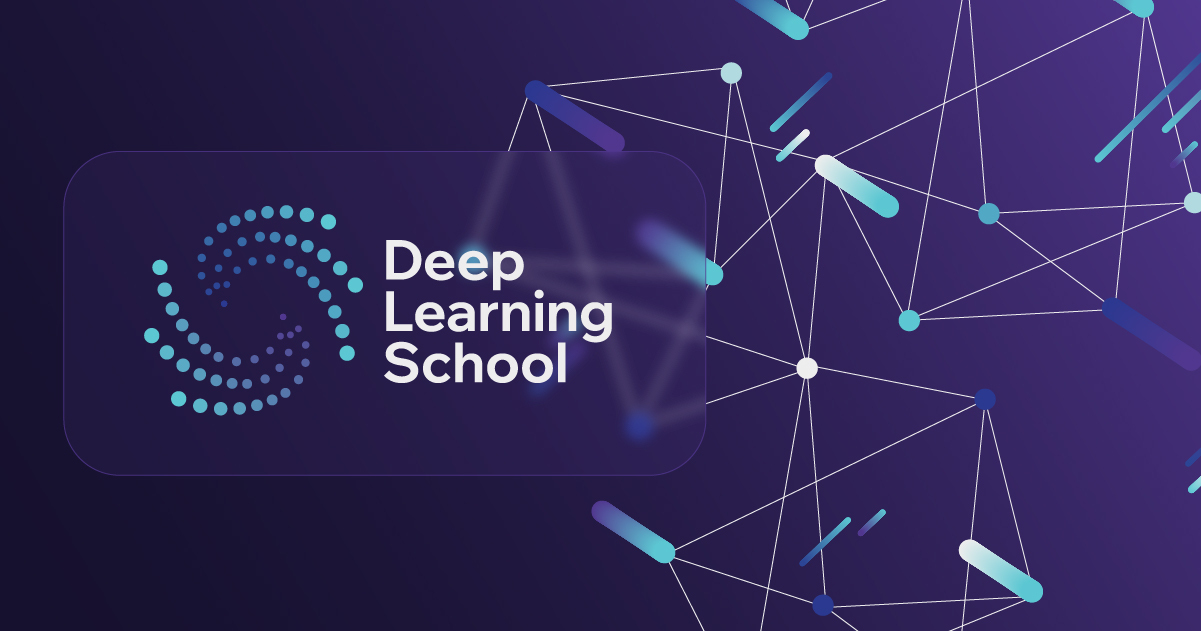

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

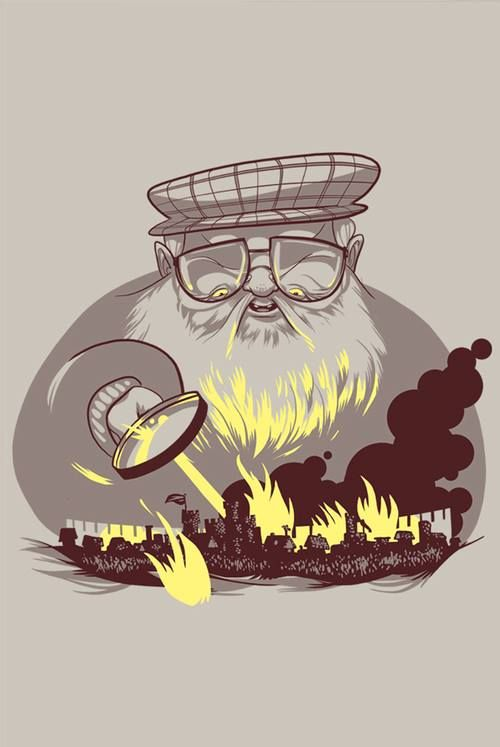

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.75$ --- 5 баллов

2) $0.75 > score \geqslant 0.65$ --- 4 балла

3) $0.65 > score \geqslant 0.55$ --- 3 балла

4) $0.55 > score \geqslant 0.50$ --- 2 балла

5) $0.50 > score \geqslant 0.45$ --- 1 балл

6) $0.45 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /Users/tsagoll/dls/pythonProject3/hw1/game_of_thrones_test.csv
100%|██████████████████████████████████████| 37.3k/37.3k [00:00<00:00, 76.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /Users/tsagoll/dls/pythonProject3/hw1/game_of_thrones_train.csv
100%|████████████████████████████████████████| 138k/138k [00:00<00:00, 1.13MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [3]:
data = pd.read_csv('game_of_thrones_train.csv', index_col=0)
test_data = pd.read_csv('game_of_thrones_test.csv', index_col=0)
data.head(7)

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
6,Tommen Baratheon,NaN,1,NaN,NaN,Cersei Lannister,Robert Baratheon,Myrcella Baratheon,NaN,NaN,...,1.0,1.0,1.0,NaN,0,0,NaN,5,1.000000,1
7,Valarr Targaryen,Hand of the King,1,Valyrian,183.0,NaN,NaN,NaN,House Targaryen,Kiera of Tyrosh,...,NaN,NaN,NaN,1.0,1,1,26.0,0,0.431438,0


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

для начала посмотрим инфу по частоте Nan'ов

In [4]:
data.isna().sum()

name                   0
title                840
male                   0
culture             1069
dateOfBirth         1278
mother              1539
father              1535
heir                1536
house                381
spouse              1357
book1                  0
book2                  0
book3                  0
book4                  0
book5                  0
isAliveMother       1539
isAliveFather       1535
isAliveHeir         1536
isAliveSpouse       1357
isMarried              0
isNoble                0
age                 1278
numDeadRelations       0
popularity             0
isAlive                0
dtype: int64

Решил сбросить эти столбцы, так как во-первых они не особо информативные, и есть наитие что на выживание они не влияют, а во-вторых подавляющее большинство значений - Nan'ы

In [5]:
data=data.drop(columns=['father','mother','heir','spouse','isAliveMother','isAliveFather','isAliveHeir','isAliveSpouse'])
#то же самое для тестовой таблицы
test_data=test_data.drop(columns=['father','mother','heir','spouse','isAliveMother','isAliveFather','isAliveHeir','isAliveSpouse'])

В качестве заглушки-значения для даты рождения возьмем медиану - потому что логично

In [6]:
med_dob = data['dateOfBirth'].median()
data['dateOfBirth'] = data['dateOfBirth'].fillna(med_dob)

#то же самое для тестовой таблицы
test_data['dateOfBirth'] = test_data['dateOfBirth'].fillna(med_dob)

Обработаем родителей, так как я в таблице заметил, что среди тех, у кого они указаны, судьба намного чаще печальная, чем у остальных

In [7]:
"""
data['mother']=data['mother'].fillna(0)
data['mother']=data['mother'].apply(lambda x: x if x==0 else 1)

data['father']=data['father'].fillna(0)
data['father']=data['father'].apply(lambda x: x if x==0 else 1)


#то же самое для тестовой таблицы
test_data['mother']=test_data['mother'].fillna(0)
test_data['mother']=test_data['mother'].apply(lambda x: x if x==0 else 1)

test_data['father']=test_data['father'].fillna(0)
test_data['father']=test_data['father'].apply(lambda x: x if x==0 else 1)
"""

"\ndata['mother']=data['mother'].fillna(0)\ndata['mother']=data['mother'].apply(lambda x: x if x==0 else 1)\n\ndata['father']=data['father'].fillna(0)\ndata['father']=data['father'].apply(lambda x: x if x==0 else 1)\n\n\n#то же самое для тестовой таблицы\ntest_data['mother']=test_data['mother'].fillna(0)\ntest_data['mother']=test_data['mother'].apply(lambda x: x if x==0 else 1)\n\ntest_data['father']=test_data['father'].fillna(0)\ntest_data['father']=test_data['father'].apply(lambda x: x if x==0 else 1)\n"

Заметил, что в таблице 30 раз встречаются ситуации, когда столбец house пуст, хотя в имени есть значение дома(пример - визерис таргариен)

In [8]:
houses = [('Frey','House Frey'), ('Stark','House Stark'), ('Targaryen','House Targaryen'),('Lannister','House Lannister'),('Hightower','House Hightower'),('Osgrey','House Osgrey'),('Greyjoy','House Greyjoy'),('Tyrell','House Greyjoy')]
k=0
def fillNa(name, houses):
    global k
    for key,house in houses:
        if key.lower() in name.lower():
            k+=1
            return house
    return 'Other'

mask=data['house'].isna()
data.loc[mask,'house']=data.loc[mask,'name'].apply(lambda x: fillNa(x,houses))

#то же самое для тестовой таблицы
maskk=test_data['house'].isna()
test_data.loc[maskk,'house']=test_data.loc[maskk,'name'].apply(lambda x: fillNa(x,houses))

In [9]:
k

35

In [10]:
data['house'].value_counts()

house
Other               351
House Frey           93
Night's Watch        88
House Stark          64
House Targaryen      54
                   ... 
House Celtigar        1
House of Ghazeen      1
House Byrch           1
House Hawick          1
House Moore           1
Name: count, Length: 316, dtype: int64

для оставшихся Nan'ов и редких домов - закинем их в Other 

In [11]:
import numpy as np

big_houses = {
    'House Frey',
    "Night's Watch",
    'House Stark',
    'House Targaryen',
    'House Lannister',
    'House Tyrell',
    'House Greyjoy'
}
data['house']=data['house'].apply(lambda x: x if x in big_houses else 'Other')


#то же самое для тестовой таблицы
test_data['house']=test_data['house'].apply(lambda x: x if x in big_houses else 'Other')

In [12]:
data['house'].value_counts()

house
Other              1155
House Frey           93
Night's Watch        88
House Stark          64
House Targaryen      54
House Lannister      37
House Greyjoy        33
House Tyrell         33
Name: count, dtype: int64

Заполняем возраст(строки с Nan) медианой - ну потому что это логично

In [13]:
mask=data['age'].isna()
age_med=data['age'].median()
data.loc[mask,'age']=data.loc[mask,'age'].fillna(age_med)

#то же самое для тестовой таблицы
maskk=test_data['age'].isna()
test_data.loc[maskk,'age']=test_data.loc[maskk,'age'].fillna(age_med)

Титулы(nan'ы) же считаю лучше заполнить Other'ами и также отнести туда все редкие значения(как и house'ы)

In [14]:
data['title'].value_counts()[:10]

title
Ser                  306
Maester               29
Archmaester           21
Lord                  19
Septon                16
Winterfell            15
Lady                  10
King in the North      9
Septa                  9
Princess               9
Name: count, dtype: int64

In [15]:
big_titles=['Ser', 'Maester', 'Archmaester', 'Lord', 'Septon', 'Winterfell', 'Lady']

data['title']=data['title'].apply(lambda x: x if x in big_titles else 'Other')


#то же самое для тестовой таблицы
test_data['title']=test_data['title'].apply(lambda x: x if x in big_titles else 'Other')

data['title'].value_counts()

title
Other          1141
Ser             306
Maester          29
Archmaester      21
Lord             19
Septon           16
Winterfell       15
Lady             10
Name: count, dtype: int64

с культурами поступим так же. как и с титулами, но чуть позже с учетом подсказки

In [16]:
data['culture'].value_counts()

culture
Northmen                   94
Ironborn                   91
Free Folk                  45
Braavosi                   39
Valyrian                   28
Dothraki                   17
Ghiscari                   17
Dornish                    17
Reach                      13
Vale mountain clans        12
Valemen                    10
Rivermen                   10
northmen                    9
Westerman                   8
Free folk                   7
Tyroshi                     6
Qartheen                    5
Astapori                    4
Stormlands                  4
Summer Isles                4
Westeros                    3
Dornishmen                  3
Northern mountain clans     3
Ironmen                     3
Westermen                   3
Crannogmen                  2
Myrish                      2
Sistermen                   2
Meereenese                  2
First Men                   2
westermen                   2
Lysene                      2
Dorne                       1
Wi

In [17]:
data['culture']=data['culture'].fillna('Other')

#то же самое для тестовой таблицы
test_data['culture']=test_data['culture'].fillna('Other')
data['culture'].value_counts()

culture
Other                      1069
Northmen                     94
Ironborn                     91
Free Folk                    45
Braavosi                     39
Valyrian                     28
Dornish                      17
Dothraki                     17
Ghiscari                     17
Reach                        13
Vale mountain clans          12
Valemen                      10
Rivermen                     10
northmen                      9
Westerman                     8
Free folk                     7
Tyroshi                       6
Qartheen                      5
Summer Isles                  4
Stormlands                    4
Astapori                      4
Ironmen                       3
Dornishmen                    3
Northern mountain clans       3
Westermen                     3
Westeros                      3
Myrish                        2
Crannogmen                    2
Meereenese                    2
First Men                     2
westermen                     2


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [18]:
def isPopular(popularity):
    if popularity>=0.57:
        return 1
    return 0

data['isPopular']=data['popularity'].apply(isPopular)

#то же самое для тестовой таблицы
test_data['isPopular']=test_data['popularity'].apply(isPopular)

In [19]:
def dRel(val):
    if val:
        return 1
    return 0
data['boolDeadRelations']=data['numDeadRelations'].apply(dRel)

#то же самое для тестовой таблицы
test_data['boolDeadRelations']=test_data['numDeadRelations'].apply(dRel)

In [20]:
data.head(6)

,name,title,male,culture,dateOfBirth,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,Other,1,Other,272.0,House Targaryen,0,0,0,0,0,0,0,24.0,11,0.605351,0,1,1
2,Walder Frey,Other,1,Rivermen,208.0,House Frey,1,1,1,1,1,1,1,97.0,1,0.896321,1,1,1
3,Addison Hill,Ser,1,Other,272.0,Other,0,0,0,1,0,0,1,24.0,0,0.267559,1,0,0
4,Aemma Arryn,Other,0,Other,82.0,Other,0,0,0,0,0,1,1,23.0,0,0.183946,0,0,0
5,Sylva Santagar,Other,0,Dornish,276.0,Other,0,0,0,1,0,1,1,29.0,0,0.043478,1,0,0
6,Tommen Baratheon,Other,1,Other,272.0,Other,0,0,0,0,0,0,0,24.0,5,1.000000,1,1,1


In [21]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

def group_cult(x):
    global cult
    val = x.lower()
    for main, c in cult.items():
        if val in c:
            return main
    return x
data['culture']=data['culture'].apply(lambda x: group_cult(x))


#то же самое для тестовой таблицы
test_data['culture']=test_data['culture'].apply(lambda x: group_cult(x))

data['culture'].value_counts()

culture
Other                      1069
Northmen                    103
Ironborn                     91
Free Folk                    56
Braavosi                     40
Valyrian                     28
Dornish                      21
Ghiscari                     18
Dothraki                     17
Westermen                    14
Reach                        13
Vale mountain clans          12
Valemen                      10
Rivermen                     10
Summer Islands                6
Tyroshi                       6
Qartheen                      6
Astapori                      4
Stormlander                   4
Northern mountain clans       3
Lysene                        3
Westerosi                     3
Ironmen                       3
Meereenese                    2
Andal                         2
Myrish                        2
Sistermen                     2
Crannogmen                    2
Norvoshi                      1
ironborn                      1
Qohor                         1


In [22]:
big_cultures=['Northmen', 'Ironborn', 'Free Folk', 'Braavosi', 'Valyrian',
       'Ghiscari']

data['culture']=data['culture'].apply(lambda x: x if x in big_cultures else 'Other')


#то же самое для тестовой таблицы
test_data['culture']=test_data['culture'].apply(lambda x: x if x in big_cultures else 'Other')


In [23]:
data['culture'].value_counts()

culture
Other        1221
Northmen      103
Ironborn       91
Free Folk      56
Braavosi       40
Valyrian       28
Ghiscari       18
Name: count, dtype: int64

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

<Axes: >

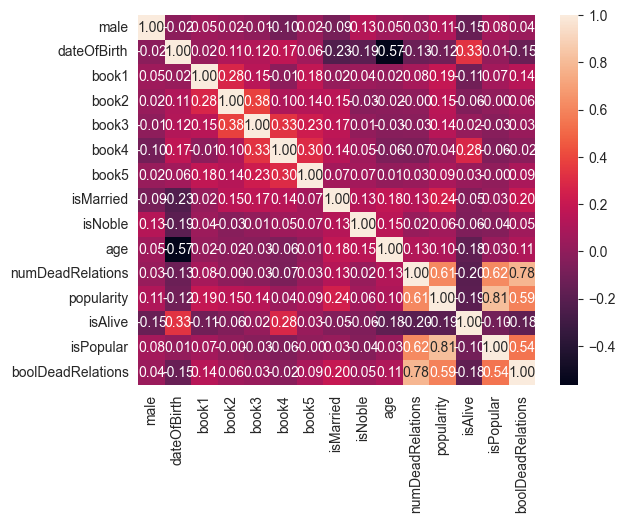

In [24]:
import seaborn as sns
num_features = data.select_dtypes(include=[np.number])
corr_matrix = num_features.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f')

In [25]:
data.drop(columns=['numDeadRelations','popularity','name'], inplace = True)
#то же самое для тестовой таблицы
test_data.drop(columns=['numDeadRelations','popularity','name'], inplace = True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

целевая переменная - категориальный, так как 1 и 0 как числа ничего не значат, они лишь означают выжил человек или нет(как подбрасывания монетки). 
видим что распределение ее - почти 3.5 к 1, что не есть хорошо, явный дисбаланс

Text(0, 0.5, 'number of people')

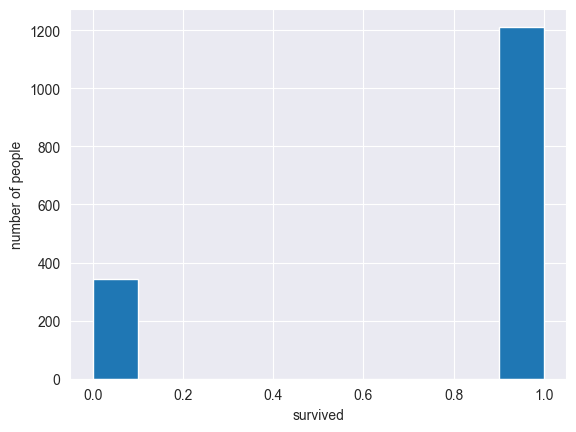

In [26]:
data['isAlive'].hist()
plt.xlabel('survived')
plt.ylabel('number of people')

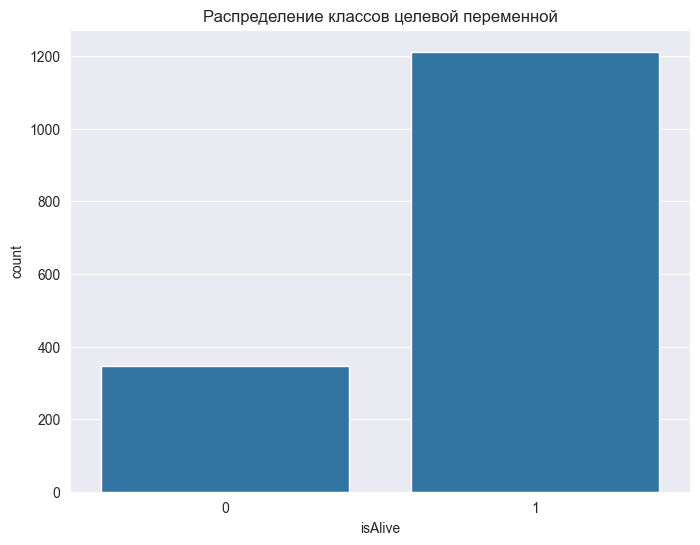

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.countplot(x='isAlive', data=data)
plt.title("Распределение классов целевой переменной")
plt.show()

и вот опять дисбаланс:

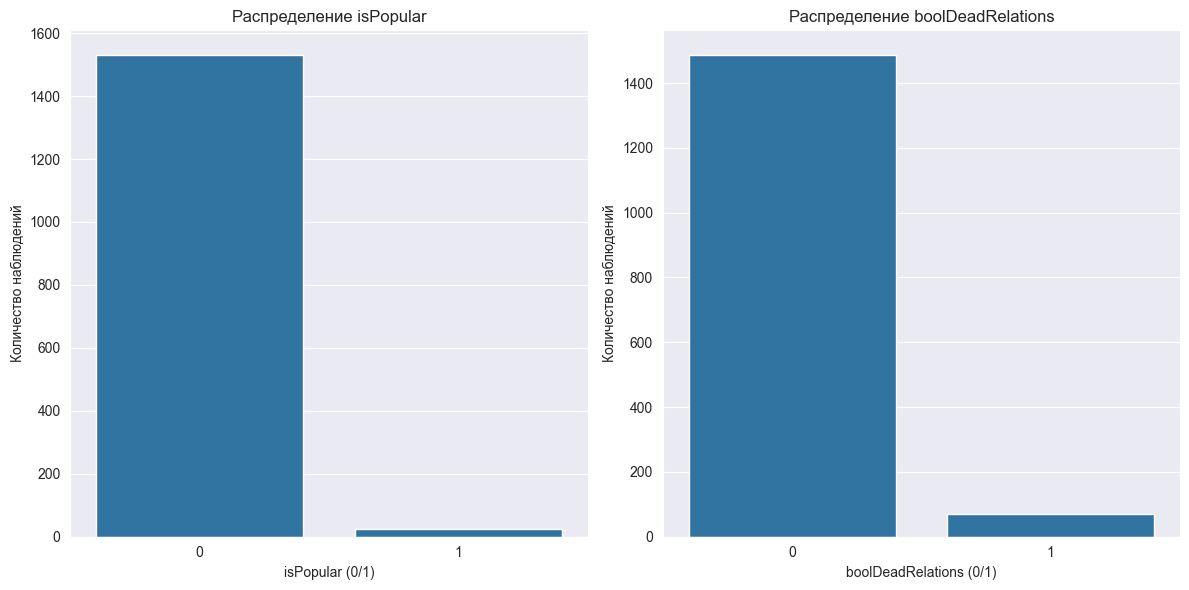

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# График для переменной isPopular
sns.countplot(x='isPopular', data=data, ax=axes[0])
axes[0].set_title("Распределение isPopular")
axes[0].set_xlabel("isPopular (0/1)")
axes[0].set_ylabel("Количество наблюдений")

# График для переменной boolDeadRelations
sns.countplot(x='boolDeadRelations', data=data, ax=axes[1])
axes[1].set_title("Распределение boolDeadRelations")
axes[1].set_xlabel("boolDeadRelations (0/1)")
axes[1].set_ylabel("Количество наблюдений")

plt.tight_layout()  # Для корректного размещения графиков
plt.show()

<Axes: xlabel='culture', ylabel='count'>

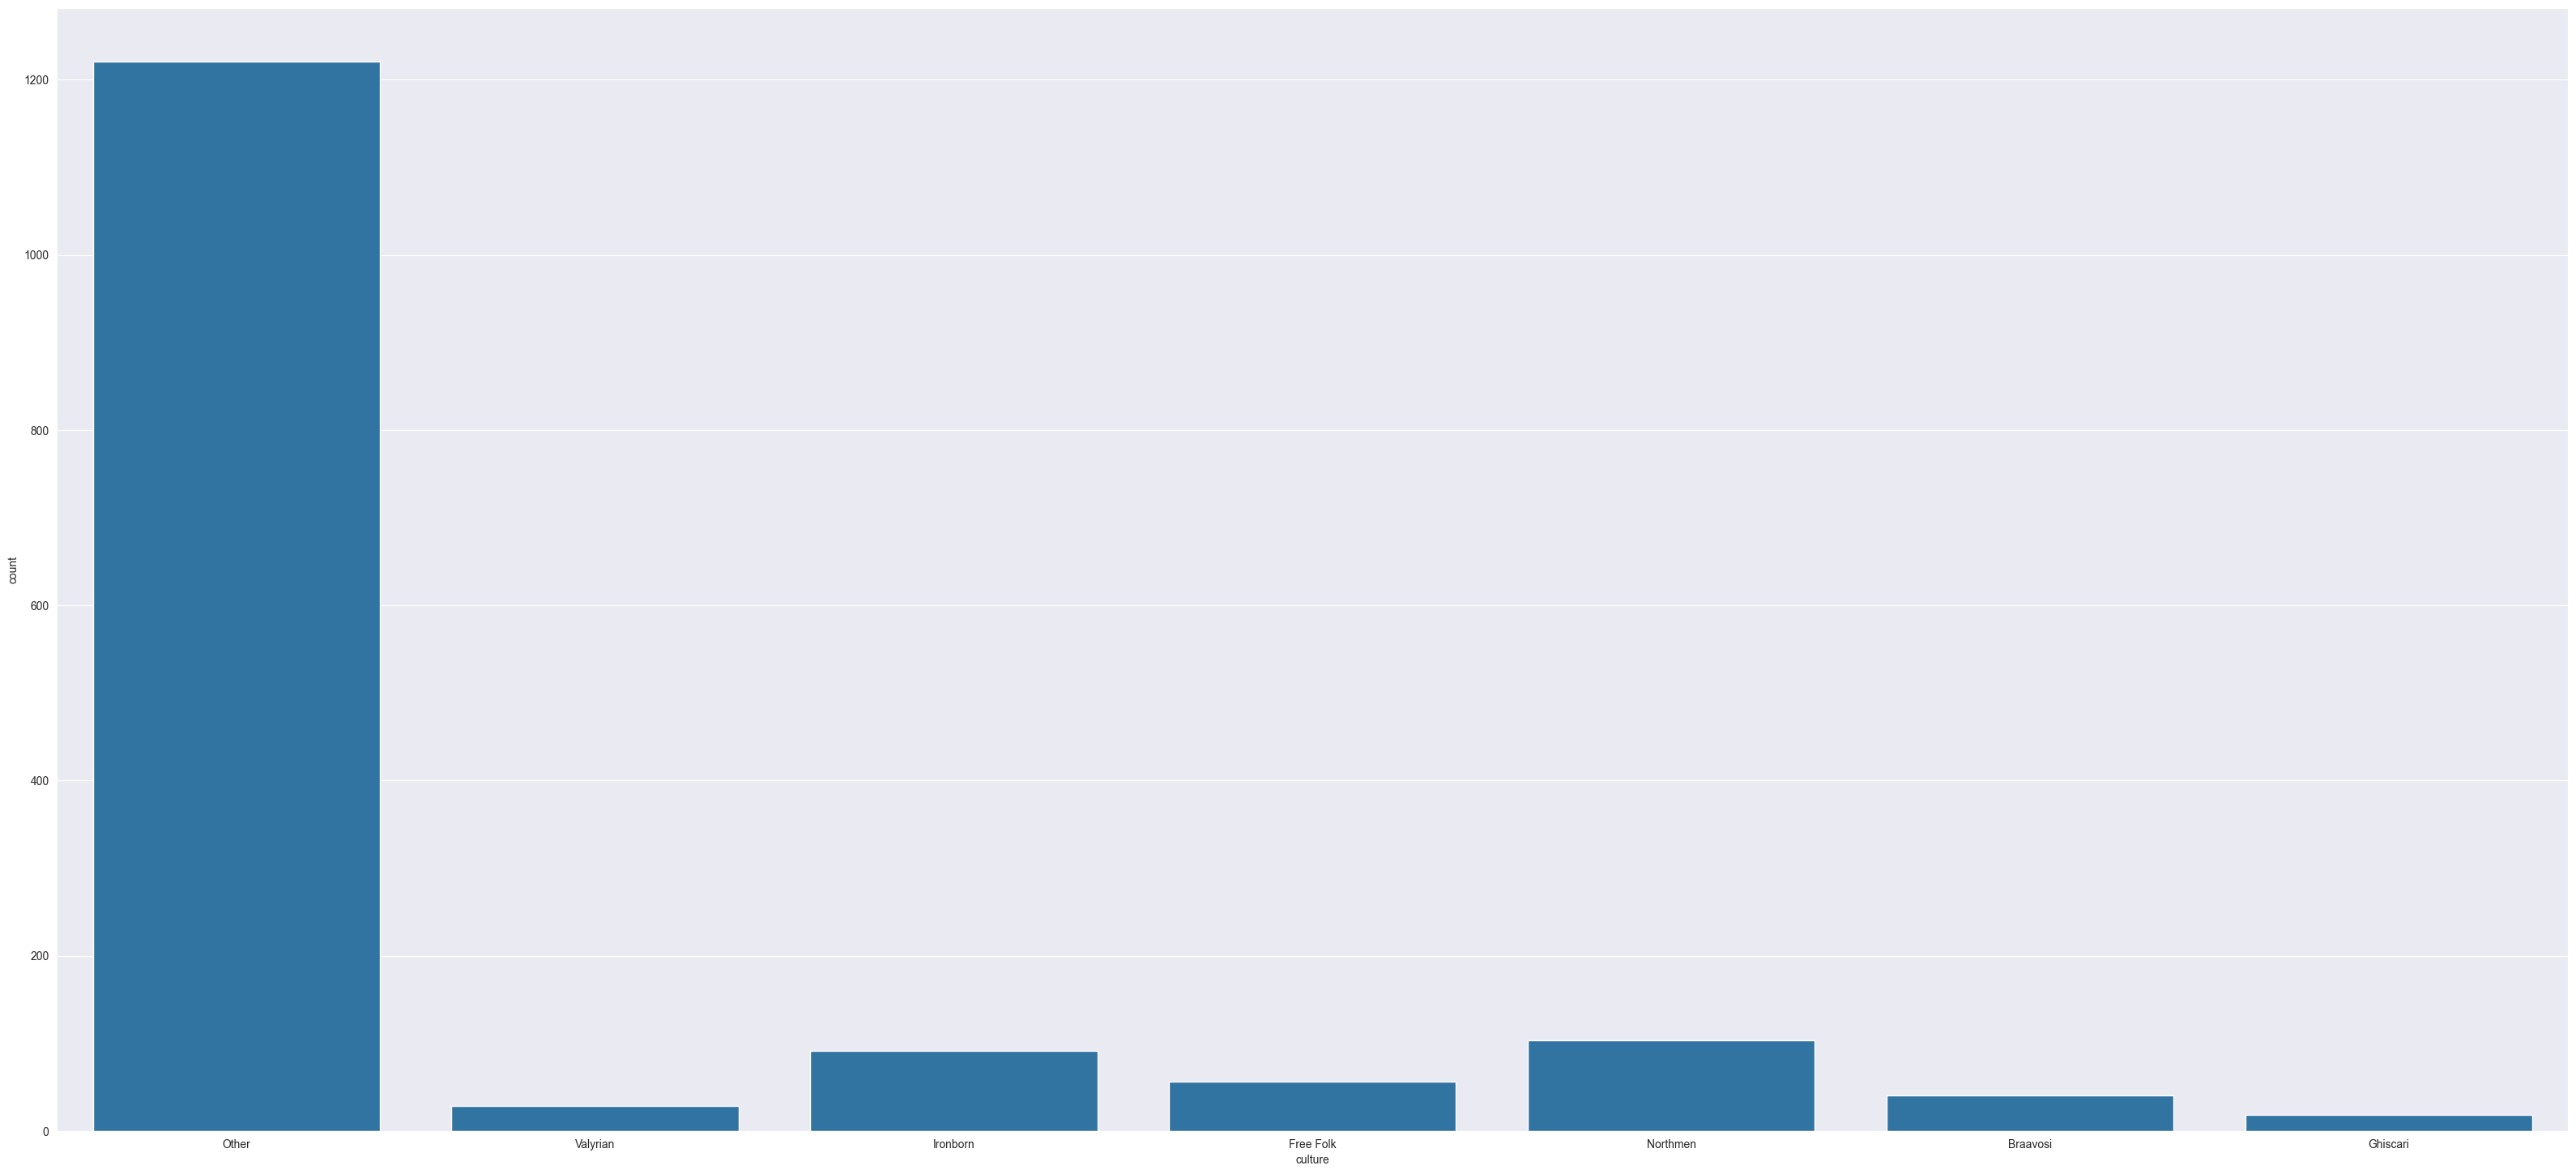

In [29]:
plt.subplots(figsize=(40, 18))
sns.countplot(x='culture', data=data)

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [30]:
from sklearn.preprocessing import LabelEncoder


data=pd.get_dummies(data,columns=['house','title','culture'])
#то же самое для тестовой таблицы
test_data=pd.get_dummies(test_data,columns=['house','title','culture'])
data.head(4)

,male,dateOfBirth,book1,book2,book3,book4,book5,isMarried,isNoble,age,...,title_Septon,title_Ser,title_Winterfell,culture_Braavosi,culture_Free Folk,culture_Ghiscari,culture_Ironborn,culture_Northmen,culture_Other,culture_Valyrian
S.No,,,,,,,,,,,,,,,,,,,,,
1,1,272.0,0,0,0,0,0,0,0,24.0,...,False,False,False,False,False,False,False,False,True,False
2,1,208.0,1,1,1,1,1,1,1,97.0,...,False,False,False,False,False,False,False,False,True,False
3,1,272.0,0,0,0,1,0,0,1,24.0,...,False,True,False,False,False,False,False,False,True,False
4,0,82.0,0,0,0,0,0,1,1,23.0,...,False,False,False,False,False,False,False,False,True,False


<Axes: >

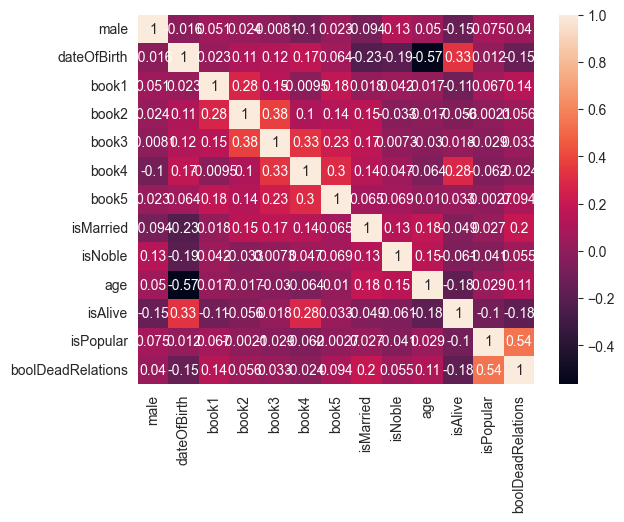

In [31]:
num_features = data.select_dtypes(include=[np.number])
corr_matrix = num_features.corr()
sns.heatmap(corr_matrix, annot=True)

есть заметная корреляция между isPopular и boolDeadRelations, но их введение ыло частью задания, так что убрать я их не могу

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

Во первых видим что признаки и популярности и мертвым родственникам довольно заметно влияют на переменную(разница в +-20 процентах), хотя в обоих случаях для значений 1 довольно мало примеров в таблцие(27 и 69 строк соответственно против 1300+ строк для значений 0)

Text(0.5, 1.0, 'Статистика выживания по селебрити')

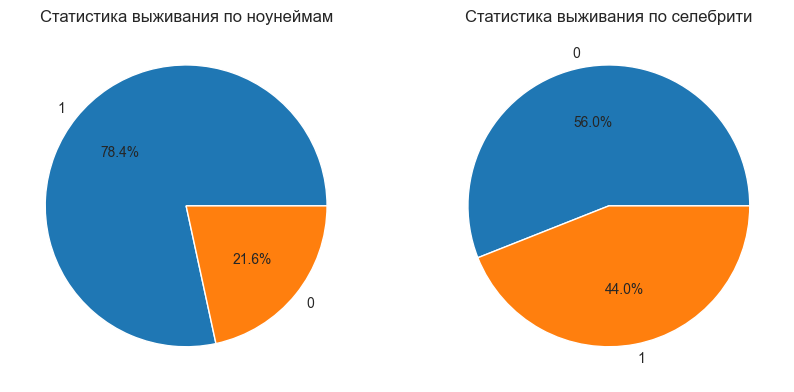

In [32]:
data0=data.loc[data['isPopular']==0]['isAlive'].value_counts()
data1=data.loc[data['isPopular']==1]['isAlive'].value_counts()

figg,axes = plt.subplots(1,2,figsize=(10,7))

axes[0].pie(data0, labels=data0.index, autopct='%1.1f%%')
axes[1].pie(data1, labels=data1.index, autopct='%1.1f%%')

axes[0].set_title('Статистика выживания по ноунеймам')
axes[1].set_title('Статистика выживания по селебрити')

Text(0.5, 1.0, 'Не имеет мертвых родственников')

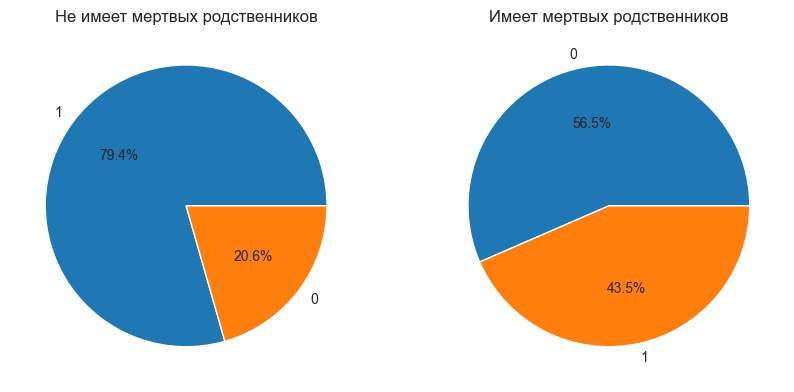

In [33]:
data0=data.loc[data['boolDeadRelations']==0]['isAlive'].value_counts()
data1=data.loc[data['boolDeadRelations']==1]['isAlive'].value_counts()

fig2,axes = plt.subplots(1,2,figsize=(10,7))

axes[0].pie(data0, labels=data0.index, autopct='%1.1f%%')
axes[1].pie(data1, labels=data1.index, autopct='%1.1f%%')

axes[1].set_title('Имеет мертвых родственников')
axes[0].set_title('Не имеет мертвых родственников')

По культурам же - видно, что где-то(если рассматривать популярные культуры) погибала большая часть культуры, а где-то даже меньше 1/6 от представителей. Так что класс явно влияющий. График по домам разбирать смысла нет, потому что на нем будет слишком много баров, так как домов много. Но признак, очевидно, значимый, так как некоторые фамилии по лору выкошены под корень(Таргариены), а некоторые - почти в войнах участия не принимали и не погибали.  

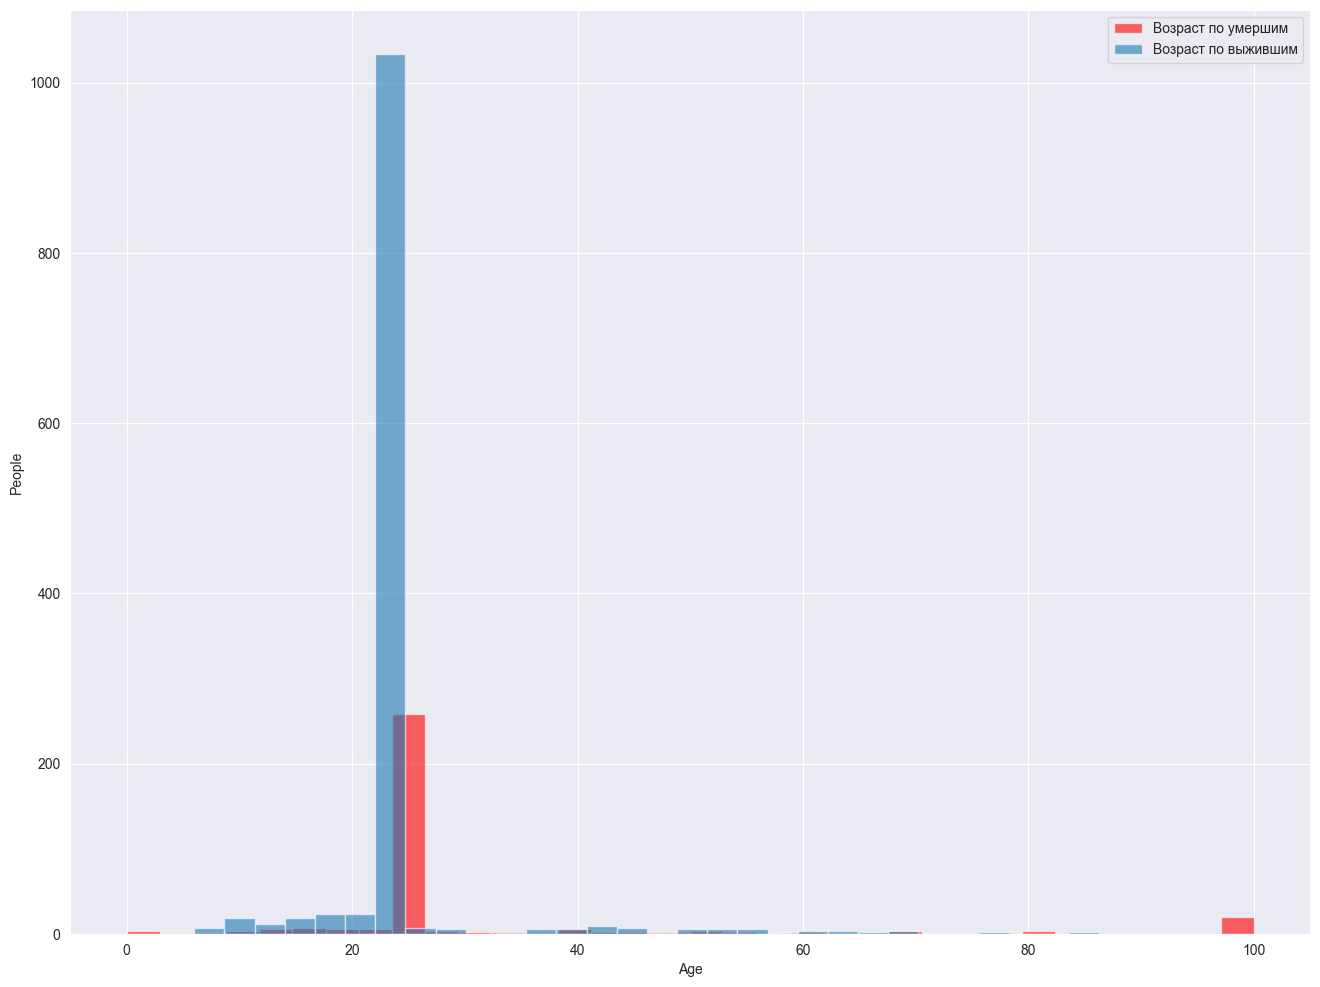

In [34]:
plt.figure(figsize=(16,12))
plt.hist(x=data.loc[(data['isAlive']==0)]['age'],alpha=0.6, label='Возраст по умершим', bins=34, color='red')
plt.hist(x=data.loc[(data['isAlive']==1)]['age'],alpha=0.6, label='Возраст по выжившим',  bins=34)
plt.xlabel('Age')
plt.ylabel('People')
plt.legend()
plt.show()

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [35]:
X = data.drop(columns=['isAlive'])
y = data['isAlive']

In [36]:
data.head(3)

,male,dateOfBirth,book1,book2,book3,book4,book5,isMarried,isNoble,age,...,title_Septon,title_Ser,title_Winterfell,culture_Braavosi,culture_Free Folk,culture_Ghiscari,culture_Ironborn,culture_Northmen,culture_Other,culture_Valyrian
S.No,,,,,,,,,,,,,,,,,,,,,
1,1,272.0,0,0,0,0,0,0,0,24.0,...,False,False,False,False,False,False,False,False,True,False
2,1,208.0,1,1,1,1,1,1,1,97.0,...,False,False,False,False,False,False,False,False,True,False
3,1,272.0,0,0,0,1,0,0,1,24.0,...,False,True,False,False,False,False,False,False,True,False


**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [39]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [40]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [41]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=10,penalty='l1',       
    solver='liblinear',  max_iter=10000)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [42]:
# Шаг 1. создание модели
adaboost = AdaBoostClassifier()
random_forest = RandomForestClassifier()
gaussian_process = GaussianProcessClassifier()
gaussian_nb = GaussianNB()
knn = KNeighborsClassifier()
svm = SVC()
decision_tree = DecisionTreeClassifier()

# Шаг 2. обучение модели
adaboost.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gaussian_nb.fit(X_train, y_train)
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)


# Шаг 3. Предсказание на тестовых данных
y_pred_adaboost = adaboost.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)
y_pred_gaussian_nb = gaussian_nb.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [43]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [44]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7724


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [45]:
# Шаг 3. Предсказание на тестовых данных
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
accuracy_gaussian_nb = accuracy_score(y_test, y_pred_gaussian_nb)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)

# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy adaboost: %.4f" % accuracy_adaboost)
print("Accuracy random_forest: %.4f" % accuracy_random_forest)
print("Accuracy gaussian_nb: %.4f" % accuracy_gaussian_nb)
print("Accuracy knn: %.4f" % accuracy_knn)
print("Accuracy svm: %.4f" % accuracy_svm)
print("Accuracy decision_tree: %.4f" % accuracy_decision_tree)

Accuracy adaboost: 0.7821
Accuracy random_forest: 0.7660
Accuracy gaussian_nb: 0.4038
Accuracy knn: 0.7724
Accuracy svm: 0.7821
Accuracy decision_tree: 0.7628


In [46]:
import pandas as pd

# Для бинарной классификации у LogisticRegression коэффициенты имеют форму (1, n_features)
feature_weights = pd.DataFrame({
    'Feature': X_train.columns,
    'Weight': logistic_regression.coef_[0]
})

print(feature_weights)


                  Feature    Weight
0                    male -0.773330
1                   book1 -0.586512
2                   book2 -0.523774
3                   book3 -0.094021
4                   book4  1.585333
5                   book5 -0.223873
6               isMarried -0.198755
7                 isNoble -0.479577
8               isPopular  0.549702
9       boolDeadRelations -1.240381
10       house_House Frey  0.350740
11    house_House Greyjoy -1.360376
12  house_House Lannister  0.049880
13      house_House Stark  1.179532
14  house_House Targaryen -1.665022
15     house_House Tyrell  1.262672
16    house_Night's Watch -0.945717
17            house_Other  0.000000
18      title_Archmaester  2.870239
19             title_Lady -0.092367
20             title_Lord -0.726579
21          title_Maester  0.665250
22            title_Other  0.108711
23           title_Septon -0.047178
24              title_Ser  0.290948
25       title_Winterfell  0.000000
26       culture_Braavosi  0

In [47]:
X_train

,male,book1,book2,book3,book4,book5,isMarried,isNoble,isPopular,boolDeadRelations,...,title_Septon,title_Ser,title_Winterfell,culture_Braavosi,culture_Free Folk,culture_Ghiscari,culture_Ironborn,culture_Northmen,culture_Other,culture_Valyrian
S.No,,,,,,,,,,,,,,,,,,,,,
783,0,0,0,0,1,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,False
1237,0,0,0,0,1,1,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
773,0,0,0,1,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
1301,1,0,0,0,0,0,0,1,0,0,...,False,False,False,False,True,False,False,False,False,False
384,1,0,0,0,0,1,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,0,0,0,0,1,1,0,1,0,0,...,False,False,False,False,False,False,False,False,True,False
1295,1,0,0,0,1,0,0,1,0,0,...,False,False,False,False,False,False,False,False,True,False
861,1,0,1,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False


Выберите лучшую модель.

Выбираю AdaBoost

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [48]:
#!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

In [49]:
X_t = test_data.reindex(columns=X_train.columns, fill_value=0)

y_t_pred = logistic_regression.predict(X_t)

In [50]:
y_t_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [51]:
submission = pd.read_csv("submission.csv", index_col='S.No')

In [52]:
submission['isAlive'] = y_t_pred
submission.value_counts()

isAlive
1          319
0           70
Name: count, dtype: int64


Как сохранить измененный Pandas DataFrame в csv файл:

In [53]:
submission.to_csv("new_submission.csv", index=False)

In [54]:
data.dtypes

male                       int64
dateOfBirth              float64
book1                      int64
book2                      int64
book3                      int64
book4                      int64
book5                      int64
isMarried                  int64
isNoble                    int64
age                      float64
isAlive                    int64
isPopular                  int64
boolDeadRelations          int64
house_House Frey            bool
house_House Greyjoy         bool
house_House Lannister       bool
house_House Stark           bool
house_House Targaryen       bool
house_House Tyrell          bool
house_Night's Watch         bool
house_Other                 bool
title_Archmaester           bool
title_Lady                  bool
title_Lord                  bool
title_Maester               bool
title_Other                 bool
title_Septon                bool
title_Ser                   bool
title_Winterfell            bool
culture_Braavosi            bool
culture_Fr